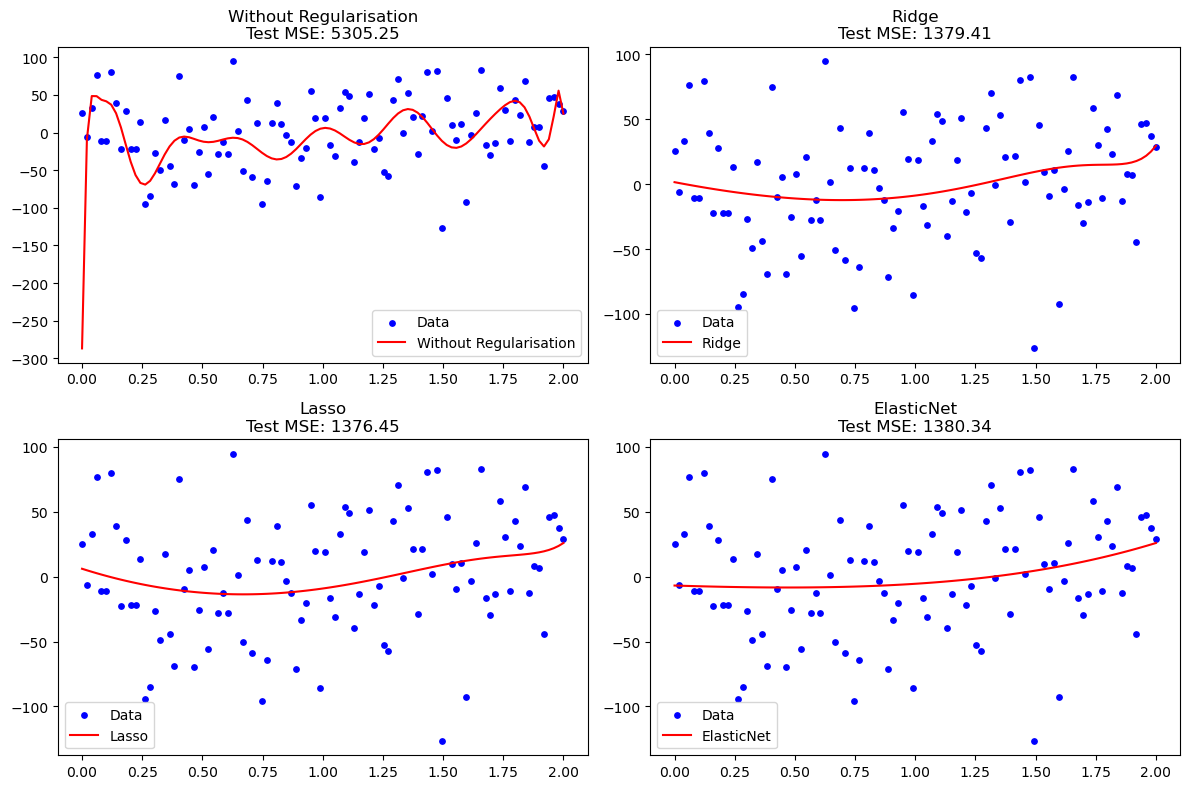


📌 Test Set MSE Results:
                 Model    Test MSE
Without Regularisation 5305.252907
                 Ridge 1379.410285
                 Lasso 1376.452426
            ElasticNet 1380.335335


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# 🔹 Step 1: Generate toy data
np.random.seed(42)
X = np.linspace(0, 2, 100).reshape(-1, 1)
coeffs = [0.5, 0, 0, -2, 0, 0.5, 3, .5] 
y_true = np.polyval(coeffs, X.squeeze())  # exact polynomial
noise = np.random.randn(len(X)) * 50      # add Gaussian noise
y = y_true + noise

# 🔹 Step 2: Polynomial degree
poly_degree = 20

# 🔹 Step 3: Define models
models = {
    "Without Regularisation": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.2, max_iter=10000),
    "ElasticNet": ElasticNet(alpha=0.3, l1_ratio=0.8, max_iter=10000)
}

# 🔹 Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ✅ Store Test MSE results
test_mse_results = {}

plt.figure(figsize=(12, 8))

for i, (name, model) in enumerate(models.items(), 1):
    pipe = make_pipeline(PolynomialFeatures(poly_degree), StandardScaler(), model)
    pipe.fit(X_train, y_train)   # ✅ train only on training set

    # Predictions
    y_pred_full = pipe.predict(X)          # for smooth plotting
    y_pred_test = pipe.predict(X_test)     # for test MSE
    mse_test = mean_squared_error(y_test, y_pred_test)
    test_mse_results[name] = mse_test

    # Plot
    plt.subplot(2, 2, i)
    plt.scatter(X, y, color="blue", s=15, label="Data")
    plt.plot(X, y_pred_full, color="red", label=f"{name}")
    plt.title(f"{name}\nTest MSE: {mse_test:.2f}")
    plt.legend()

plt.tight_layout()
plt.show()

# ✅ Show Test MSE Table
print("\n📌 Test Set MSE Results:")
test_mse_table = pd.DataFrame(list(test_mse_results.items()), columns=["Model", "Test MSE"])
print(test_mse_table.to_string(index=False))


# print(y)

In [37]:
print(y)

[ 2.98357077e-14 -1.92310601e-15  3.73485842e-14  8.10844962e-14
 -6.79442468e-15 -6.78295648e-15  8.39413551e-14  4.34605379e-14
 -1.82381459e-14  3.25170517e-14 -1.76610362e-14 -1.76960990e-14
  1.78393513e-14 -8.93112590e-14 -7.78756346e-14 -1.43811897e-14
 -2.45983736e-14  6.72554509e-14  5.51073429e-14  1.18561424e-13
  4.15643752e-13  5.85646693e-13  1.00976697e-12  1.57548456e-12
  2.59670989e-12  4.08900723e-12  6.16444185e-12  9.32073839e-12
  1.36392979e-11  1.97606669e-11  2.81719432e-11  3.97869204e-11
  5.51954528e-11  7.58418653e-11  1.03313311e-10  1.39104429e-10
  1.85847329e-10  2.45957305e-10  3.23123609e-10  4.21328661e-10
  5.45388352e-10  7.01179166e-10  8.95786645e-10  1.13753307e-09
  1.43621543e-09  1.80358363e-09  2.25313122e-09  2.80086446e-09
  3.46515589e-09  4.26758608e-09  5.23336850e-09  6.39093135e-09
  7.77355300e-09  9.41929791e-09  1.13715437e-08  1.36799680e-08
  1.64010660e-08  1.95992845e-08  2.33473381e-08  2.77275834e-08
  3.28328653e-08  3.87680